# **Importing Main Libraries**

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Data Loading And Inspection**

In [280]:
penguins=sns.load_dataset("penguins")

In [281]:
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [282]:
print(penguins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [283]:
print(penguins.describe(include="all"))

       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN                NaN   
mean       NaN     NaN       43.921930      17.151170         200.915205   
std        NaN     NaN        5.459584       1.974793          14.061714   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.225000      15.600000         190.000000   
50%        NaN     NaN       44.450000      17.300000         197.000000   
75%        NaN     NaN       48.500000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    342.000000   333  
unique          NaN     2  
top

# **Data Cleaning**

In [284]:
print(penguins.isnull())

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False            True           True               True   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex  
0          False  False  
1          False  False  
2          False  False  
3      

In [285]:
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [1]:
penguins["bill_length_mm"].fillna(penguins["bill_length_mm"].median(),inplace=True)

NameError: name 'penguins' is not defined

In [287]:
penguins["bill_depth_mm"].fillna(penguins["bill_depth_mm"].mean(),inplace=True)

/tmp/ipython-input-1196910542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins["bill_depth_mm"].fillna(penguins["bill_depth_mm"].mean(),inplace=True)


In [288]:
penguins["bill_depth_mm"].fillna(penguins["bill_depth_mm"].median(),inplace=True)

/tmp/ipython-input-2787296418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins["bill_depth_mm"].fillna(penguins["bill_depth_mm"].median(),inplace=True)


In [289]:
penguins.dropna(subset=["body_mass_g"],inplace=True)

In [290]:
penguins["sex"].fillna(penguins["sex"].mode()[0],inplace=True)

/tmp/ipython-input-3322845404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins["sex"].fillna(penguins["sex"].mode()[0],inplace=True)


In [291]:
#check
print(penguins.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


# **Explorator Data Analysis (EDA)**

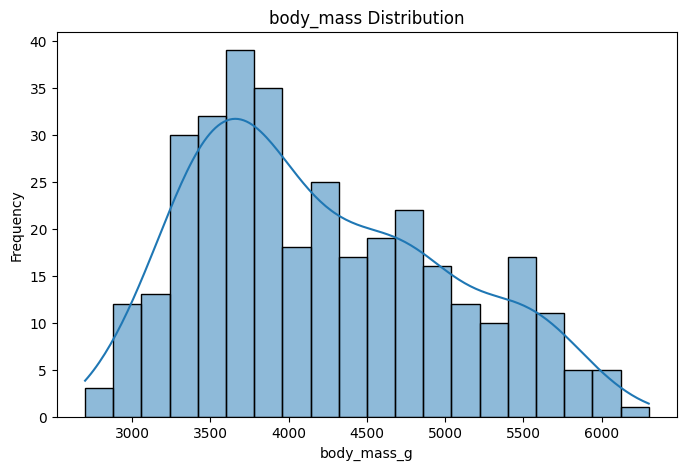

In [292]:
plt.figure(figsize=(8,5))
sns.histplot(penguins["body_mass_g"],bins=20,kde=True)
plt.title("body_mass Distribution")
plt.xlabel("body_mass_g")
plt.ylabel("Frequency")
plt.show()

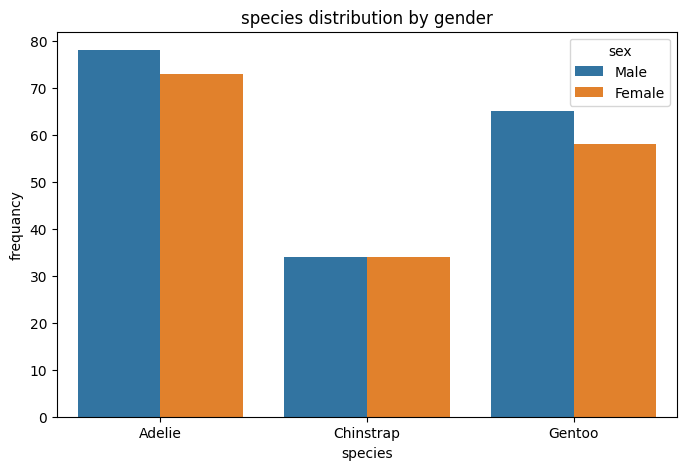

In [293]:
plt.figure(figsize=(8,5))
sns.countplot(x="species",hue="sex",data=penguins)
plt.xlabel("species")
plt.ylabel("frequancy")
plt.title("species distribution by gender")
plt.show()

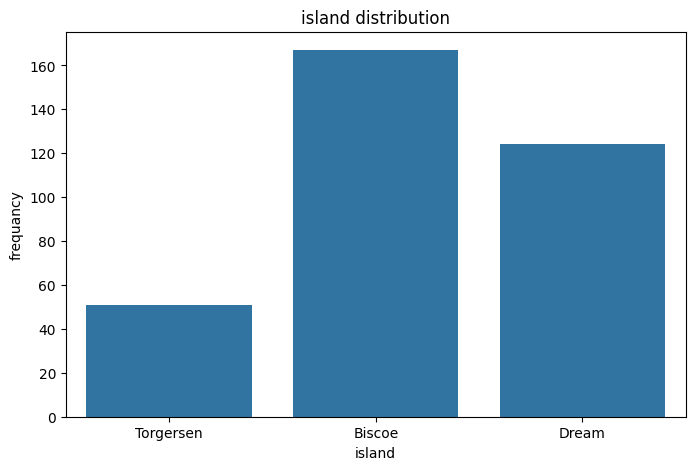

In [294]:
plt.figure(figsize=(8,5))
sns.countplot(x="island",data=penguins)
plt.xlabel("island")
plt.ylabel("frequancy")
plt.title("island distribution")
plt.show()

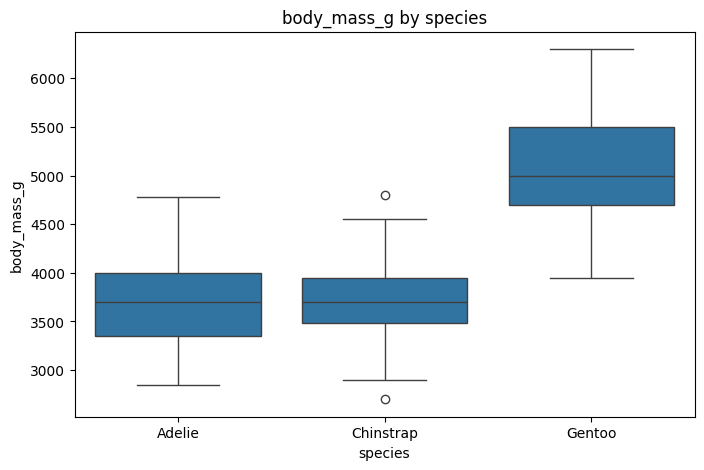

In [295]:
plt.figure(figsize=(8,5))
sns.boxplot(x="species",y="body_mass_g",data=penguins)
plt.xlabel("species")
plt.ylabel("body_mass_g")
plt.title("body_mass_g by species")
plt.show()

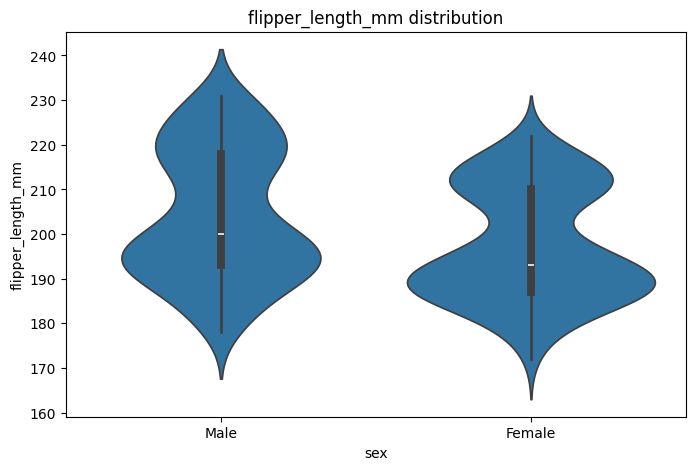

In [296]:
plt.figure(figsize=(8,5))
sns.violinplot(x="sex",y="flipper_length_mm",data=penguins)
plt.xlabel("sex")
plt.ylabel("flipper_length_mm")
plt.title("flipper_length_mm distribution")
plt.show()

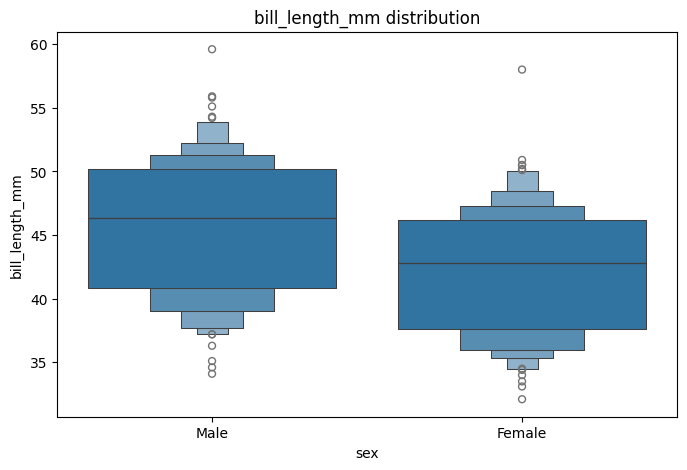

In [297]:
plt.figure(figsize=(8,5))
sns.boxenplot(x="sex",y="bill_length_mm",data=penguins)
plt.xlabel("sex")
plt.ylabel("bill_length_mm")
plt.title("bill_length_mm distribution")
plt.show()

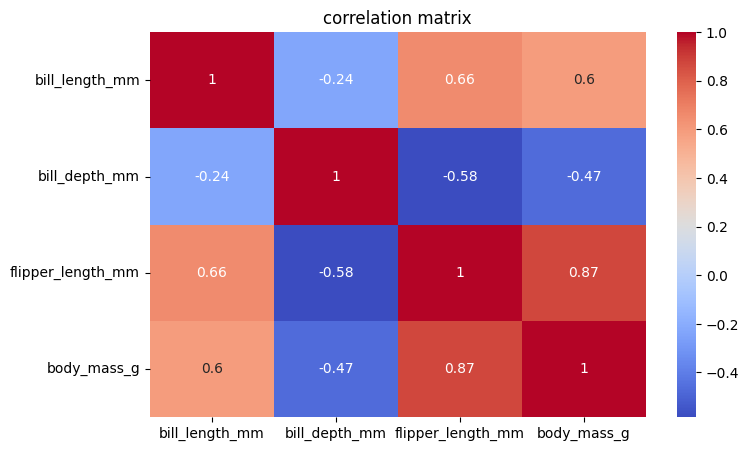

In [298]:
numerical_penguins=penguins.select_dtypes(include=["int64","float64"])
cor=numerical_penguins.corr()
plt.figure(figsize=(8,5))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

<Figure size 800x500 with 0 Axes>

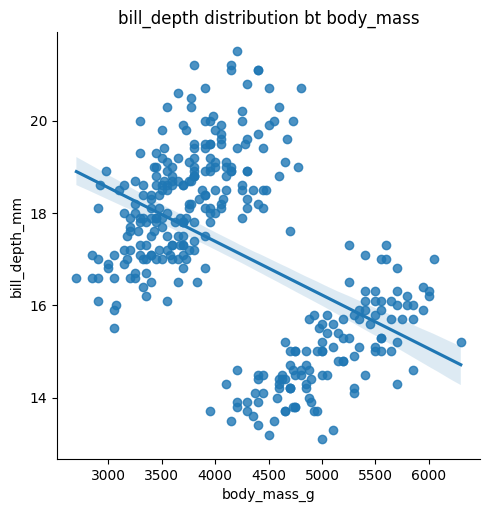

In [299]:
plt.figure(figsize=(8,5))
sns.lmplot(x="body_mass_g",y="bill_depth_mm",data=penguins)
plt.xlabel("body_mass_g")
plt.ylabel("bill_depth_mm")
plt.title("bill_depth distribution bt body_mass")
plt.show()

<Figure size 800x500 with 0 Axes>

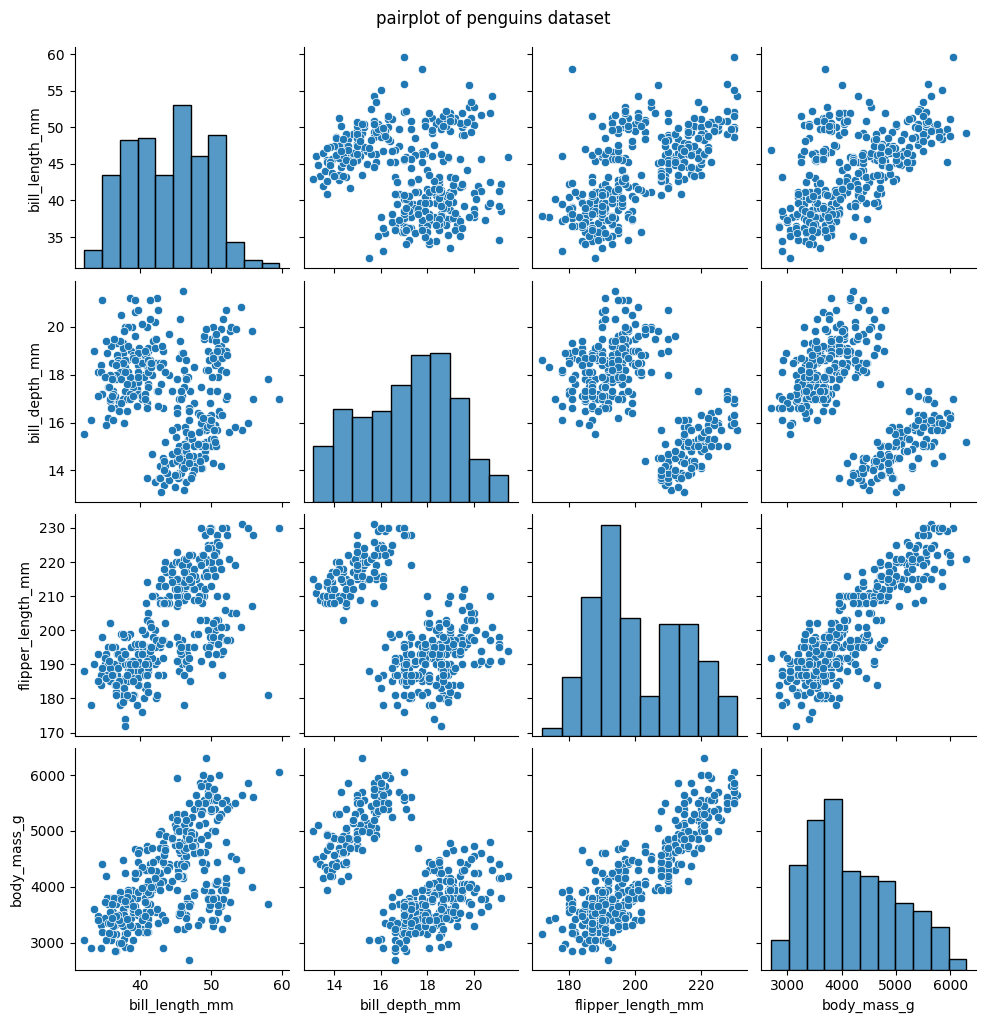

In [300]:
plt.figure(figsize=(8,5))
sns.pairplot(penguins)
plt.suptitle("pairplot of penguins dataset",y=1.02)
plt.show()

<Figure size 800x500 with 0 Axes>

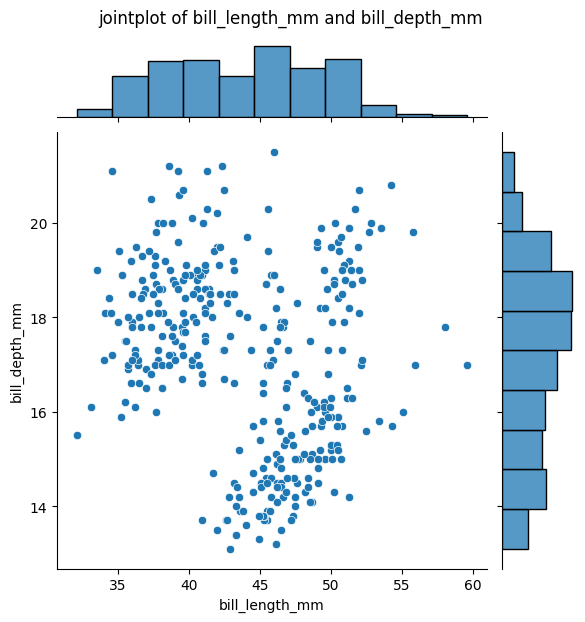

In [301]:
plt.figure(figsize=(8,5))
sns.jointplot(x="bill_length_mm",y="bill_depth_mm",data=penguins,kind="scatter")
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.suptitle("jointplot of bill_length_mm and bill_depth_mm",y=1.03)
plt.show()

# **Summary Of Analysis**

1.Body Mass Distribution (Histogram)

I started by plotting a histogram of body_mass_g.

The distribution looked fairly normal, centered around 3700–4000g.

No extreme outliers were observed, so using the mean to fill missing values was a statistically sound decision.

This tells us that penguin body mass is consistent across the dataset with natural biological variation.


2.Species Count (Countplot with Hue = Species)

A countplot showed that Adelie is the most common species in the dataset.

Then came Gentoo, and finally Chinstrap.

This confirms a class imbalance which may affect classification models later on.

The visual also helps spot how evenly the data is split when species is used as hue.


3.Island Distribution (Countplot)

Using a countplot of the island column:

Biscoe island had the highest number of penguins.

Dream came second, followed by Torgersen.


This hints that certain species may be geographically concentrated on certain islands.

4.Flipper Length by Sex (Violin Plot)

A violin plot comparing flipper_length_mm across sex categories showed:

Male penguins generally have longer flippers than females.

The distribution for males was wider, indicating more variance.


This confirms sexual dimorphism, which is common in animal datasets.


5.Missing Data Handling

You chose smart imputation methods:

body_mass_g → filled with mean (since distribution was normal)

sex → filled with mode (perfect for categorical data)


These are best practices in data cleaning and preserve dataset size.
